# **Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.**

<Axes: >

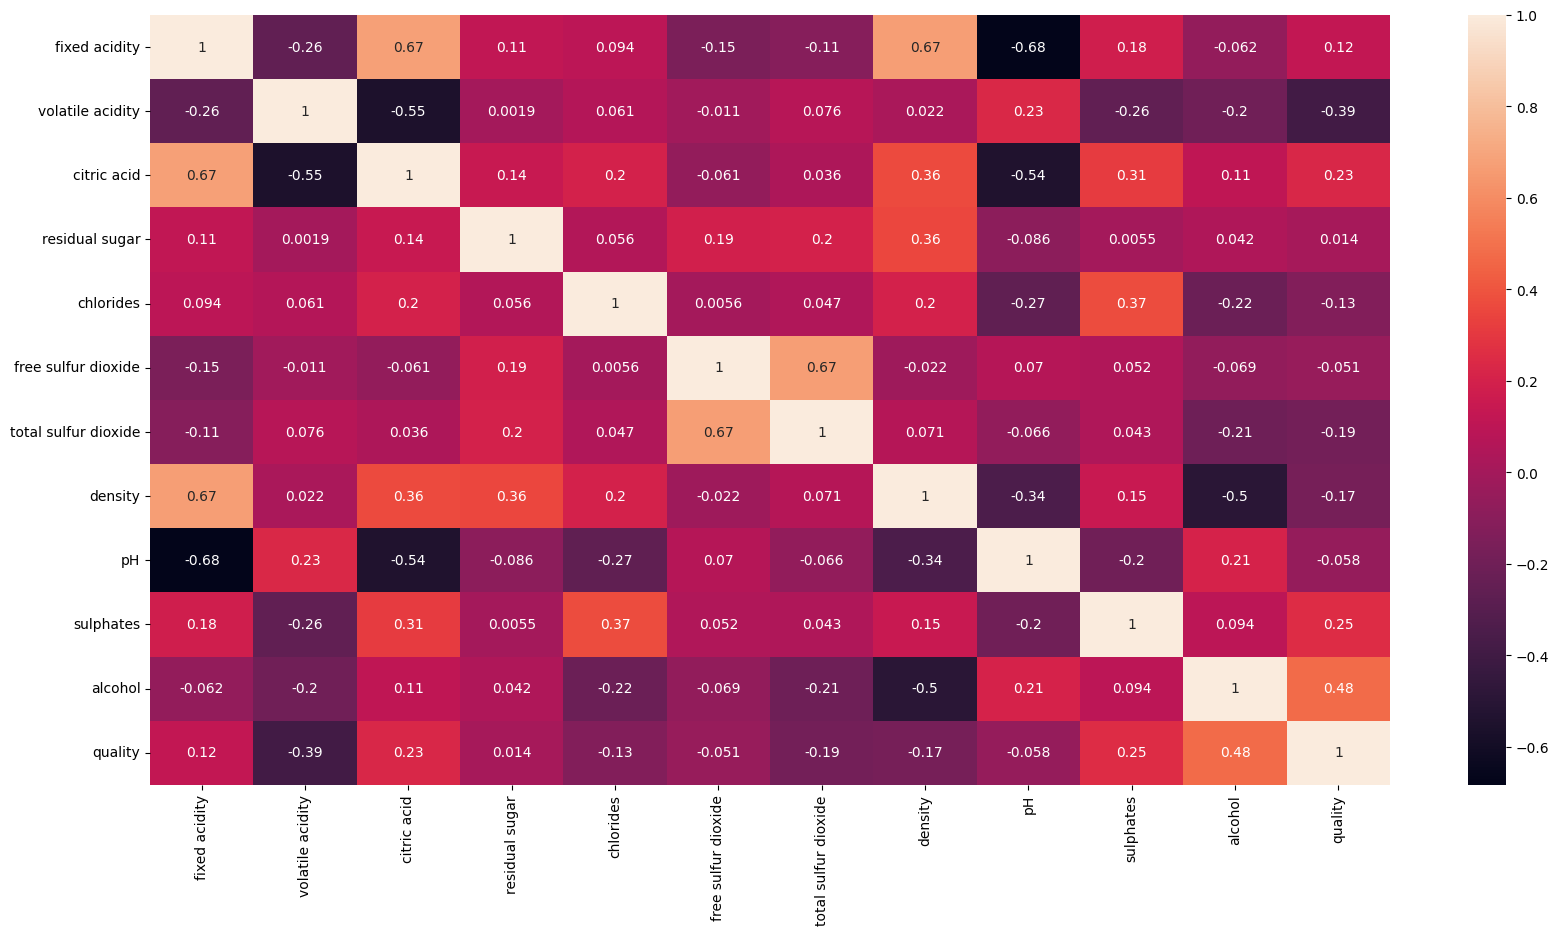

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Datasets/1.0-winequality-red.csv")
df.head()

plt.figure(figsize=(20,10))
plt.subplot()
sns.heatmap(df.corr(),annot=True)

# looking at the graph below we can say that there is a key features like alcohol ,citric acid and sulphates which are corralational to the quakity of wine

# we can predict that a good amount of citric acid , sulphate and alcohol can make a good quality wine.

# ther are some other features which can cause the reasone for good quality wine but they do not play some major role like fixed acidity and rsudial sugar


# **Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.**

**ANS :-**
while working on dataset making sure that the dataset has any missing values in it , is one of the primary task while doing Data analysis because it can cause impact on the model 

- to do that we can use the pandas , which is shown in below:

if there are some missing values , we can use diffrent imputation technique , like mean/mode imputation 
- There are some Advantages and Disadavantages of mean/mode imputation which are as follows:
- **Adavantages**
    - simple and easy to implement
    - preserves the central tendancy of the data
    - works well when the missing data is missing completely at random (MCAR)

- **Disadavantages**
    - Does not capture the underlying distribution .
    - can lead to biased results if the missing data is not random MCAR
    - can distort relationship between variables 

In [2]:
import pandas as pd 

df = pd.read_csv("Datasets/1.0-winequality-red.csv")
df.head()
df.isnull().sum()

# from below output we can say that there is no missing values in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?**


#### To analys student performance in exam we should create a output(dependent) variable which indiacate there total and avg scores in exam

### **For analysing the key featues that are affeacted on student performance first we have to calculate the total score of students and avarage score .**


<Axes: xlabel='avarage_score', ylabel='Count'>

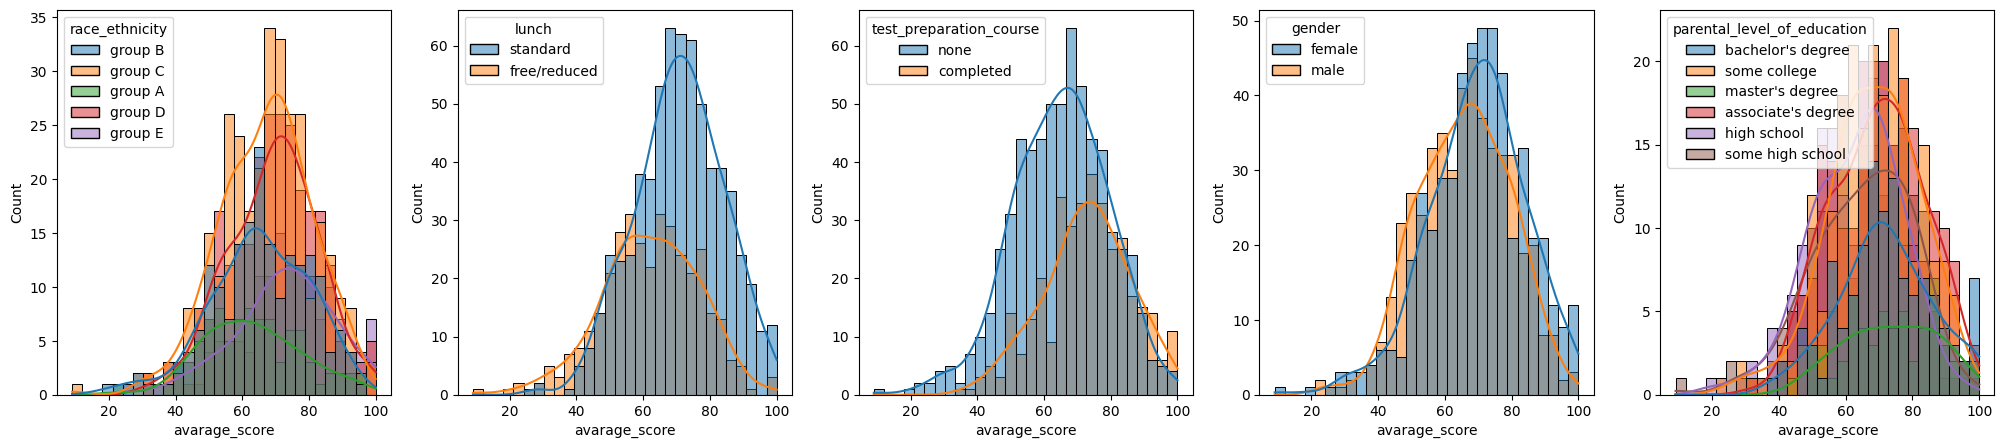

In [3]:
import pandas as pd 
import numpy as ns
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("./Datasets/stud.csv")

# Create two variable as "total_score" and "Avarage" to get the key features which are affecting on the student performance

df['Total_score'] = (df['math_score']+df['reading_score']+df['writing_score'])
df['avarage_score'] = df['Total_score']/3
df.head(1)

# Now let's check the key features by ploting graphs

plt.subplots(1,5,figsize=(25,5))
plt.subplot(151)
sns.histplot(data=df,x=df['avarage_score'],bins=30,kde=True,hue="race_ethnicity")
plt.subplot(152)
sns.histplot(data=df,x=df['avarage_score'],bins=30,kde=True,hue="lunch")
plt.subplot(153)
sns.histplot(data=df,x=df['avarage_score'],bins=30,kde=True,hue="test_preparation_course")
plt.subplot(154)
sns.histplot(data=df,x=df['avarage_score'],bins=30,kde=True,hue="gender")
plt.subplot(155)
sns.histplot(data=df,x=df['avarage_score'],bins=30,kde=True,hue="parental_level_of_education")

# **conclusion**
based on the visualizations, the potential key features affecting student performance in this dataset are likely to be:
- Race/Ethnicity
- Lunch Type
- Test Preparation Course
- Parental Level of Education


1. **Race/Ethnicity (race_ethnicity):**
   From the histogram subplot, you can observe that different race/ethnicity groups have different average score distributions. This suggests that race or ethnicity might be a key feature affecting student performance.

2. **Lunch Type (lunch):**
   The distribution of average scores between students who receive a standard lunch and those who receive a free/reduced lunch appears to show a difference. This implies that the type of lunch might be a key feature influencing student performance.

3. **Test Preparation Course (test_preparation_course):**
   The histogram indicates that students who completed a test preparation course tend to have slightly higher average scores compared to those who didn't. This suggests that completing a test preparation course might be a relevant key feature.

4. **Gender:**
   The histogram for gender shows that the distribution of average scores is similar for both genders. However, there could still be subtle differences that the visualization might not fully capture. Further analysis might be needed to determine if gender is a key feature.

5. **Parental Level of Education (parental_level_of_education):**
   The histograms based on parental education levels demonstrate varying distributions of average scores. This indicates that parental education might be an important factor influencing student performance.


# **Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?**


#### Feature Engineering is the process where the most important features were selected for training machine learning model for better prediction from  model . in the context of the student performance we must consider the features that affected the total score of student , we can do this in various techniques like ploting histogram as we do in previous question and we can also use the correlation properity , but first we have to create a fully numerical dataset , for that we have to convert the  categorical features into numerical feature and than find the correalation between them , after that we get our important features which of the features have high correlation are the most important features 
*let's take a look at it practicaly :*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: >

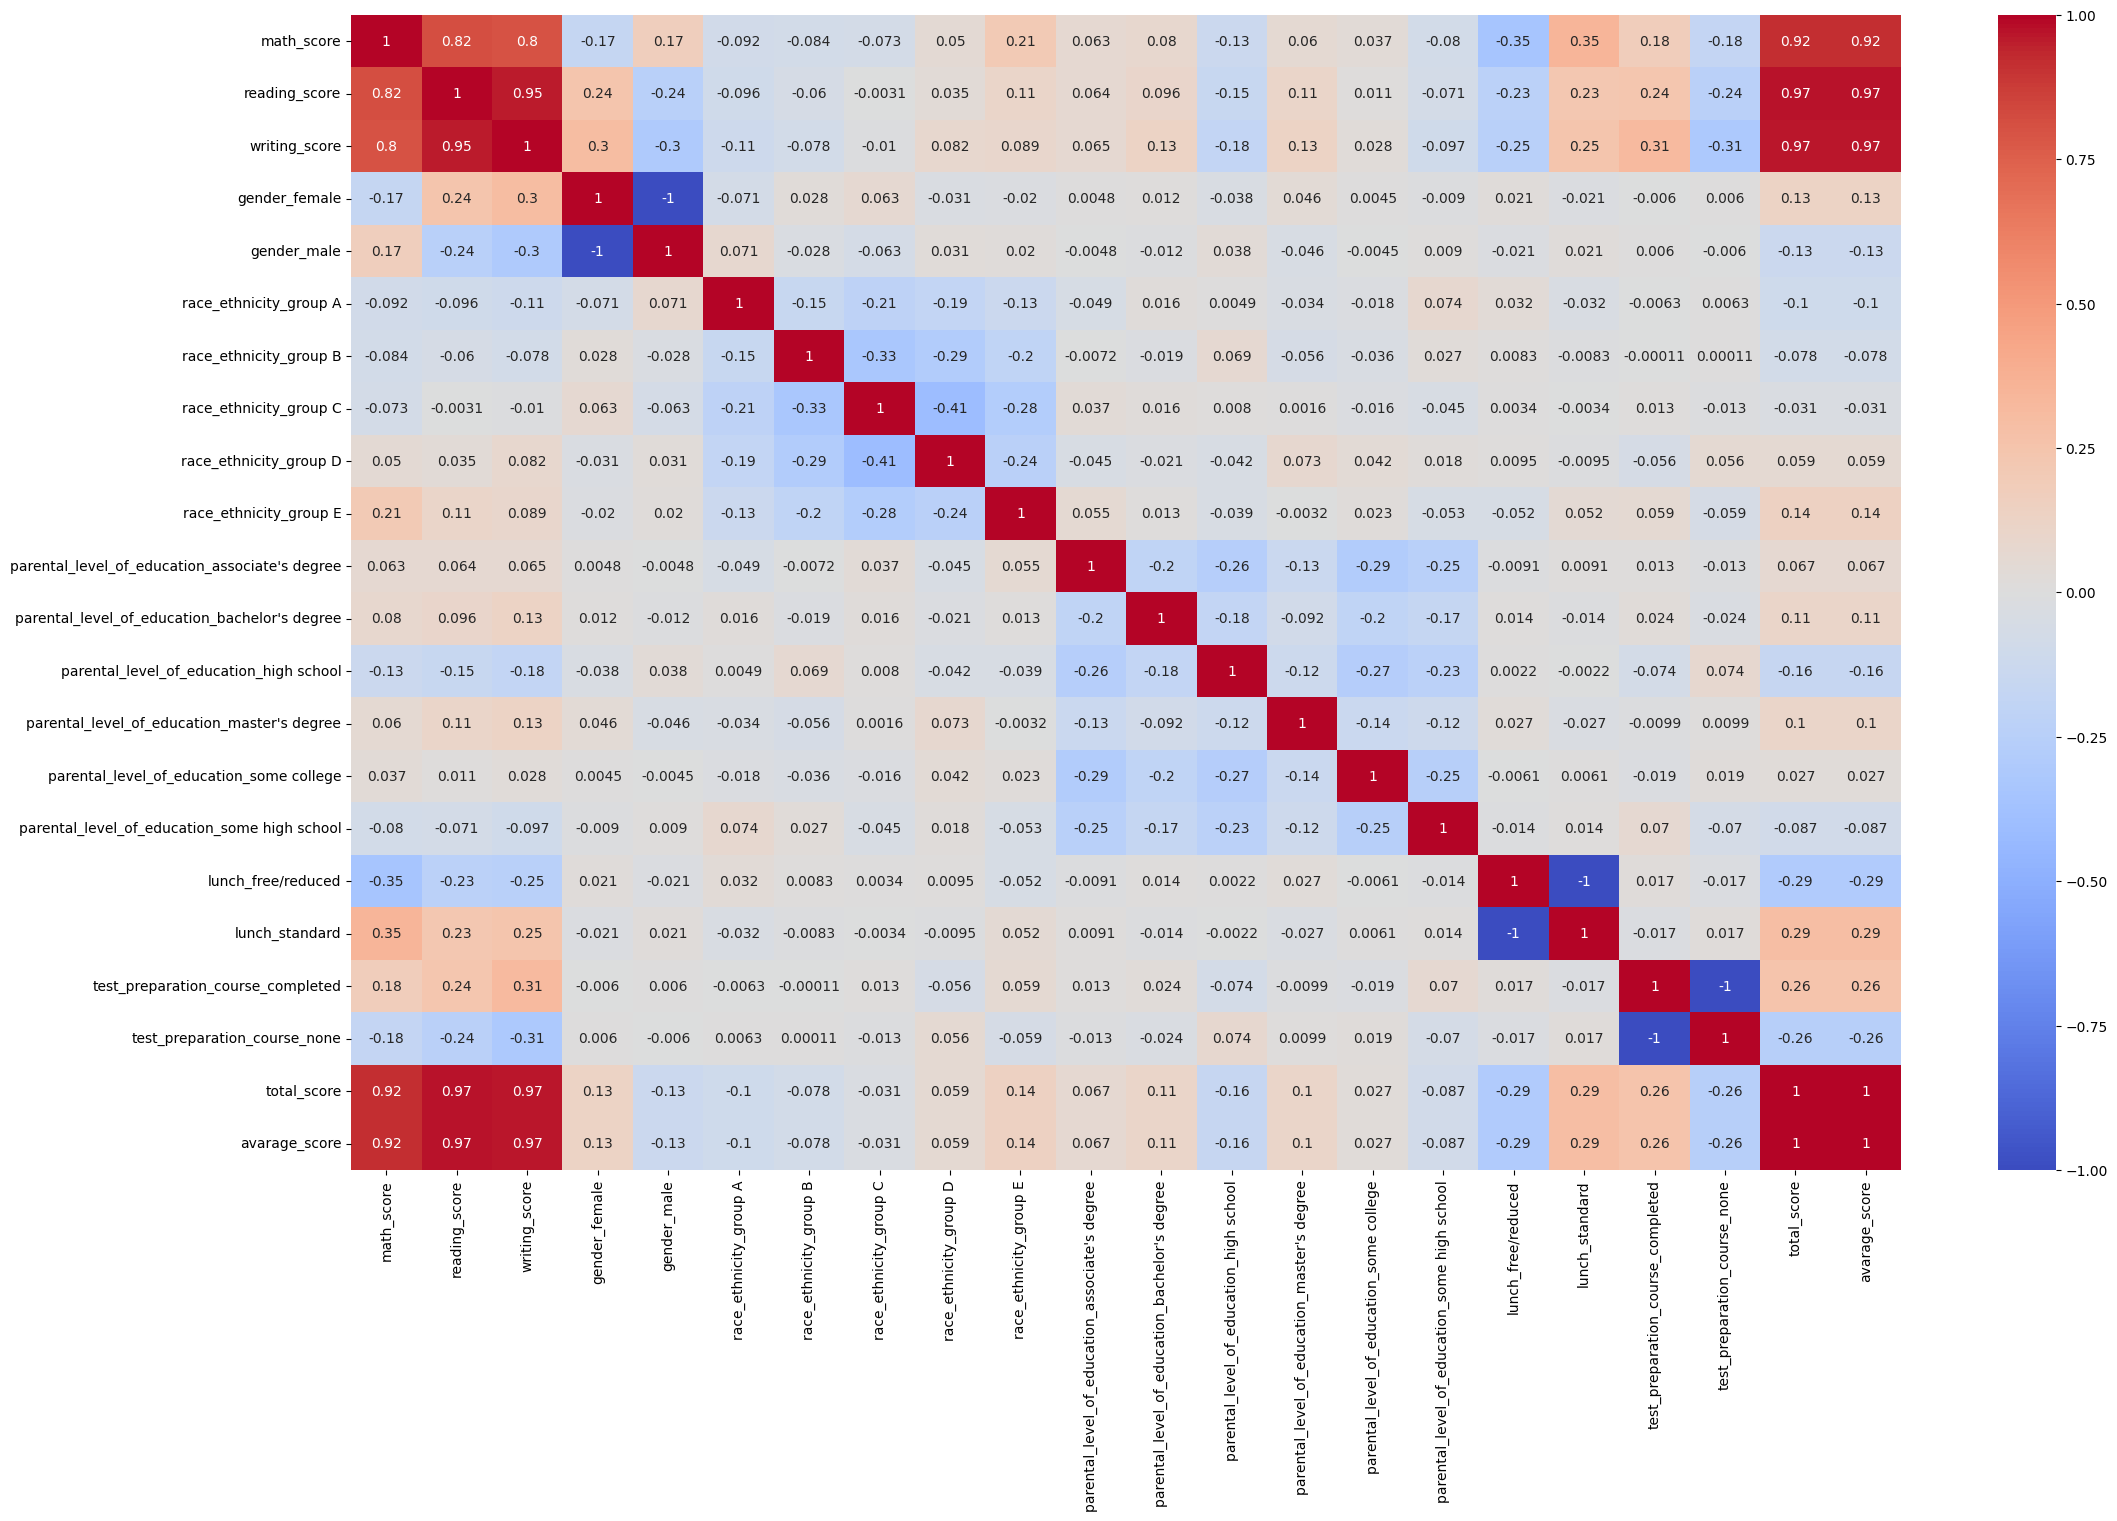

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')
encoder = OneHotEncoder()

df = pd.read_csv("./Datasets/stud.csv")
df.head(2)
df.info()
# there are five categorical variable we have to covert them into numerical variable 
categorical_varibles= ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course']
encoded = encoder.fit_transform(df[categorical_varibles]).toarray()

encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df  = pd.concat([df,encoded_df],axis=1)

df.drop(categorical_varibles,axis=1,inplace=True)
df.head()
df.columns
df_copy = df.copy()
# df_copy.drop(['math_score','reading_score','writing_score'],axis=1,inplace=True, cmap='coolwarm')

df_copy['total_score']= df['math_score']+df['reading_score']+df['writing_score']
df_copy['avarage_score'] = df_copy['total_score']/3

plt.figure(figsize=(25,15))
plt.subplot()
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')

# conclusion :
female students score;s higher than male students 
students with high score in math score ,reading score , writing score has higher avarage score 
group D and E perform well in exams than other groups 


# **Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?**


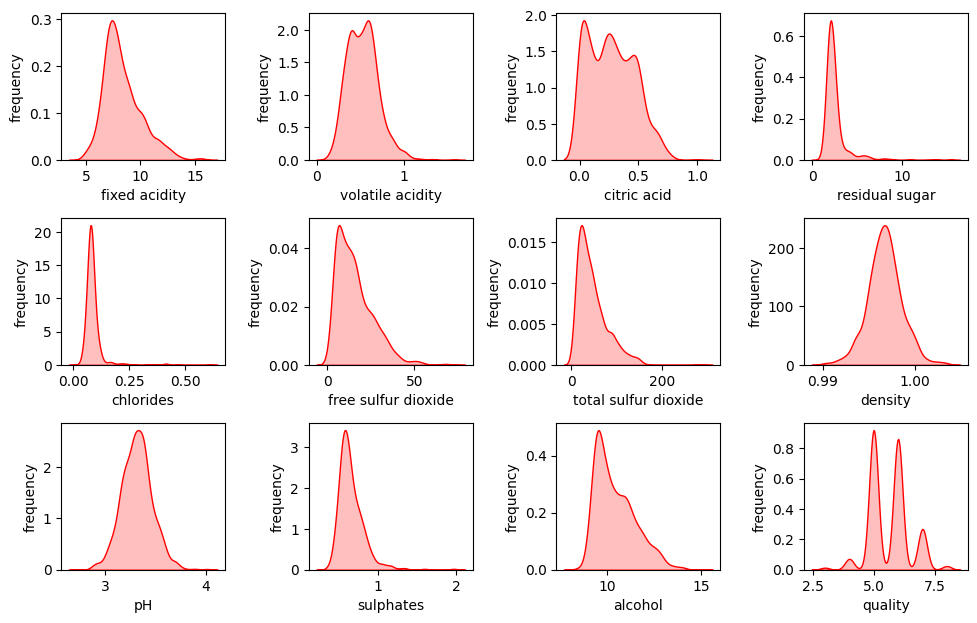

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

wine_df = pd.read_csv('./Datasets/1.0-winequality-red.csv') # Wine quality Dataset loaded

# inspect the data : display the first five rows of the dataset 
wine_df.head()

# summery statistics :

wine_df.describe()

# Distribution visualization: 

# lets say we want to visualize the distribution of the alcohol feature name
feature_list = []
for i in wine_df.columns:
    feature_list.append(i)
    
plt.figure(figsize=(10,10))

for i, col in enumerate(feature_list, 1):
    feature_name =  col
    feature_data = wine_df[feature_name]
    plt.subplot(5, 4, i)  # 2 rows, 3 columns, i-th subplot
    sns.kdeplot(feature_data, color='red', shade=True)
    plt.xlabel(col)
    plt.ylabel('frequency')
    
    
# Create a single figure for all subplots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# **Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?**


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df =  pd.read_csv('./Datasets/1.0-winequality-red.csv')
df.head()

# standerdize the data 
df_std = StandardScaler().fit_transform(df)
pca = PCA()
pca.fit(df_std)
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
n_components = 0
for i in range(len(explained_variance_ratio)):
    if sum(explained_variance_ratio[:i+1]) >= 0.9:
        n_components =i+1
        break
print(f'the minimum number of principle components required to explain 90% of the varaince is {n_components}')

the minimum number of principle components required to explain 90% of the varaince is 8
